# Part I - Prosper Loan Data
## by Tunmise Oluwadare

## Introduction
> This data set contains 113,937 loan listings with 81 variables on each loan originated between 2006 and 2014. Each loan in the dataset includes information on the borrower's credit score, income, employment status, loan amount, loan status, and other relevant borrower and loan characteristics. The  exploration of these variables in the Prosper Loan Dataset can provide insights into the characteristics of borrowers and loans.

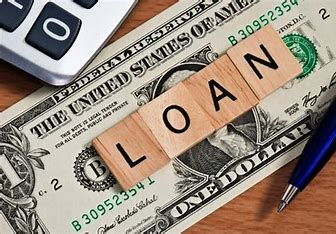

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
Data = pd.read_csv('prosperLoanData.csv')

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
Data.describe(include='all')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,113937,1.139370e+05,113937,28953,113937.000000,113937,55089,113912.000000,113937.000000,113937.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
unique,113066,NaN,113064,8,NaN,12,2802,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,17A93590655669644DB4C06,NaN,2013-10-02 17:20:16.550000000,C,NaN,Current,2014-03-04 00:00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,6,5649,NaN,56576,105,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.278857e+05,NaN,NaN,40.830248,NaN,NaN,0.218828,0.192764,0.182701,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,NaN,3.280762e+05,NaN,NaN,10.436212,NaN,NaN,0.080364,0.074818,0.074516,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,NaN,4.000000e+00,NaN,NaN,12.000000,NaN,NaN,0.006530,0.000000,-0.010000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,NaN,4.009190e+05,NaN,NaN,36.000000,NaN,NaN,0.156290,0.134000,0.124200,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,NaN,6.005540e+05,NaN,NaN,36.000000,NaN,NaN,0.209760,0.184000,0.173000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,NaN,8.926340e+05,NaN,NaN,36.000000,NaN,NaN,0.283810,0.250000,0.240000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000


### What is the structure of your dataset?

> The dataset containes 113,937 loan entries (rows) with 81 variables (columns)

### What is/are the main feature(s) of interest in your dataset?

> BorrowerAPR - The Borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Term - The length of the loan expressed in months.

> BorrowerRate - The Borrower's interest rate for this loan. 

> ListingCategory (numeric) - The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

> BorrowerState - The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

> Occupation - The Occupation selected by the Borrower at the time they created the listing.

> EmploymentStatus - The employment status of the borrower at the time they posted the listing.

> LoanOriginalAmount - Initial amount of loan borrowed

> DebtToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% was returned as 1001%).

> IncomeRange - The income range of the borrower at the time the listing was created.

#### There are 81 columns and only 11 columns are needed, so these columns will be extracted other columns will be dropped

In [5]:
columns = ['BorrowerAPR', 'Term', 'BorrowerRate', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome']
Loan = Data.loc[:, columns]
Loan.head(5)

,BorrowerAPR,Term,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
0,0.16516,36,0.1580,0,CO,Other,Self-employed,9425,0.17,"$25,000-49,999",3083.333333
1,0.12016,36,0.0920,2,CO,Professional,Employed,10000,0.18,"$50,000-74,999",6125.000000
2,0.28269,36,0.2750,0,GA,Other,Not available,3001,0.06,Not displayed,2083.333333
3,0.12528,36,0.0974,16,GA,Skilled Labor,Employed,10000,0.15,"$25,000-49,999",2875.000000
4,0.24614,36,0.2085,2,MN,Executive,Employed,15000,0.26,"$100,000+",9583.333333


## Univariate Exploration

#### BorrowerAPR distribution

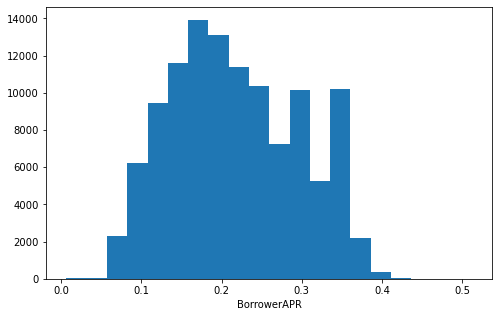

In [6]:
plt.figure(figsize=(8,5))
plt.hist(data=Loan, x = 'BorrowerAPR', bins = 20)
plt.xlabel('BorrowerAPR')

plt.show()

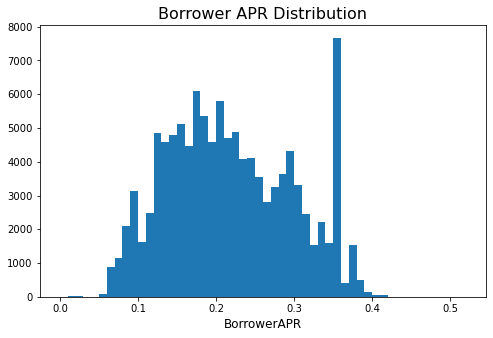

In [7]:
# reduce binsize to get a more detailed view of the plot
plt.figure(figsize=(8,5))

binsize = np.arange(0, Loan['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data=Loan, x = 'BorrowerAPR', bins = binsize)
plt.xlabel('BorrowerAPR', fontsize = 12)
plt.title('Borrower APR Distribution', fontsize = 16)

plt.show()

BorrowerAPR initially looked unimodal with peak values just a little lower than 0.2 but on a closer inspection, it seems values between 0.3 and 0.4 have the highest occurence with a very distinct peak greater than 7000 but less than 8000

#### Term

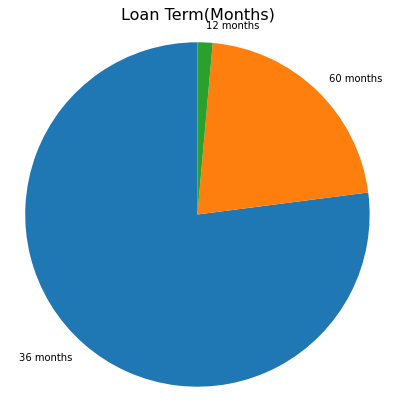

In [8]:
Loan_Term = Loan['Term'].value_counts()
label = ['36 months', '60 months', '12 months']

plt.figure(figsize=(7,7))
plt.pie(Loan_Term, labels=label, startangle=90)
plt.axis('square')

plt.title('Loan Term(Months)', fontsize = 16)
plt.show()

There are three loan categories. Most of the loans registered were for 36 months while the least popular category was the 12 months loan term

#### Listing Category

In [9]:
Loan['ListingCategory'] = Loan['ListingCategory (numeric)'].replace({0 : 'Not Available', 1: 'Debt Consolidation', 
                            2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 
                            7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring',
                            12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 
                            16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}).astype('category')

In [10]:
def categorical_plot(data, x_column, figsize=None, colour=None, order=None, xlabel=None, title=None, rotation=None):
    """
    plot a countplot distribution of a categorical varible in a Dataframe.
    
    Parameters:
    -----------
    data: pandas DataFrame
        The DataFrame to plot from.
    x_column: str
        The column name to plot on the x_axis.
    figsize: tuple, optional
        The size of the plot. Default is (10,5)
    colour: str, optional
        Color palette to use for the plot. if None, uses the default seaborn color palette.
    order: list, optional
        The order to plot the categories in. If none, uses the order in which they appear in DataFrame
    xlabel: str, optional
        The label for the y-axis. If None, uses the name of the x_column.
    title: str, optional
        The title of the plot. If None, not title is displayed.
        
    Returns:
    --------
    None
    """
    if figsize is None:
        plt.figure(figsize=(10,5))
    else:
         plt.figure(figsize=figsize)
             
    sns.countplot(data=data, x=x_column, order=order, color=colour)
    
      
    if xlabel is None:
        plt.xlabel(x_column, fontsize=12)
    else:
        plt.xlabel(xlabel, fontsize=12)
    
    if title is not None:
        plt.title(title, fontsize=16)
    
    if rotation is not None:
        plt.xticks(rotation=rotation)
    
    plt.show()

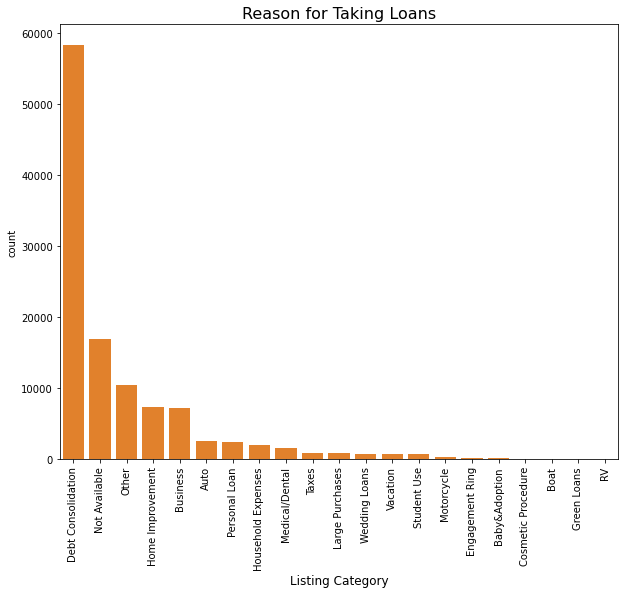

In [11]:
categorical_plot(data=Loan,
                x_column='ListingCategory',
                figsize=(10,8),
                colour=sns.color_palette()[1],
                order=Loan['ListingCategory'].value_counts().index,
                xlabel='Listing Category',
                title= 'Reason for Taking Loans',
                rotation=90)

> The Listing category was in numeric so i created a new variable named ListingCategory from ListingCategory(numeric) assigning the corresponding meaning to the numbers to give the visualization a better context at first glance

> Debt consolidation seems to be the most common reason for taking loans and a high numner of people would rather not state the reason for taking loansa while very few people took loans for Cosmetic Procedure, Boat, Green loans and RV

#### Which State has the most people applying for Loans?

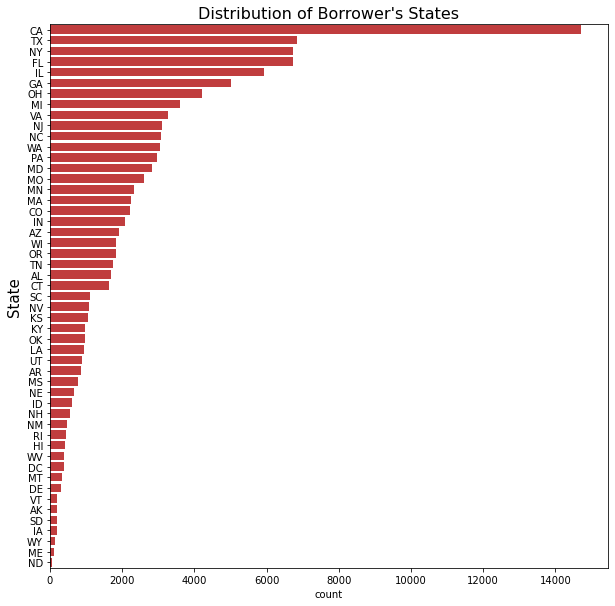

In [12]:
plt.figure(figsize= (10,10))
colour = sns.color_palette()[3]
State_order = Loan['BorrowerState'].value_counts().index

sns.countplot(data=Loan, y='BorrowerState', color = colour, order = State_order);

plt.ylabel('State', fontsize = 15);
plt.title("Distribution of Borrower's States", fontsize = 16)

plt.show()

> It can be concluded that this loan dataset is for US only and California has the highest number of loan listing. 

> It can be observed also that the top 4 countries with the highest loan listing are also the top 4 most populated states in the US.

#### Employment Status of Borrowers

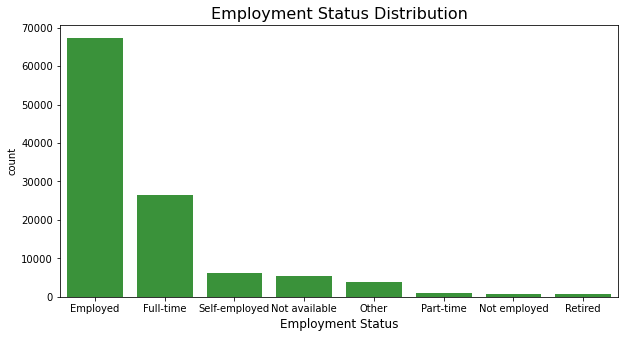

In [13]:
categorical_plot(data=Loan,
                x_column='EmploymentStatus',
                colour=sns.color_palette()[2],
                order=Loan['EmploymentStatus'].value_counts().index,
                xlabel='Employment Status',
                title= "Employment Status Distribution")

Most of the borrowers granted loan were employed. This makes sense because it would be easy for them to repay the funds borrowed.

The documentation of employment is not clear enough because an employed person can either be working full time or part time. Also a Self-employed person is still employed!

The data will be more concise if it were grouped in the following categories: Employed, Not Employed, Retired, Others and Not Available

#### Occupation of Listed Borrowers

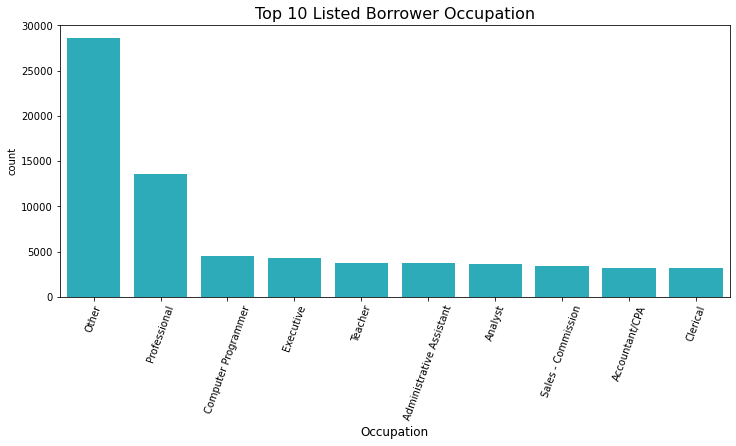

In [14]:
categorical_plot(data=Loan,
                x_column='Occupation',
                figsize=(12,5),
                colour=sns.color_palette()[-1],
                order=Loan['Occupation'].value_counts().head(10).index,
                title= 'Top 10 Listed Borrower Occupation',
                rotation=70)

Majority of the borrowers selected others as occupation followed by professional.

#### What is the Income Range Distribution of the Borrowers

In [15]:
Loan['IncomeRange'].unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

In [16]:
#IncomeRange to ordinal categorical
ordinal_Income = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_Income['IncomeRange'])
Loan['IncomeRange'] = Loan['IncomeRange'].astype(ordered_var)

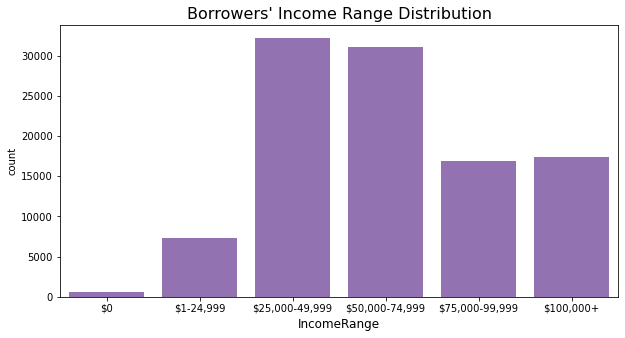

In [17]:
#Borrower Income Range Status Distribution
categorical_plot(data=Loan,
                x_column='IncomeRange',
                colour=sns.color_palette()[4],
                title= "Borrowers' Income Range Distribution")

Most of the borrowers had an Income Range between $25,000 and $75,000

#### Amount of Loan Borrowed Distribution

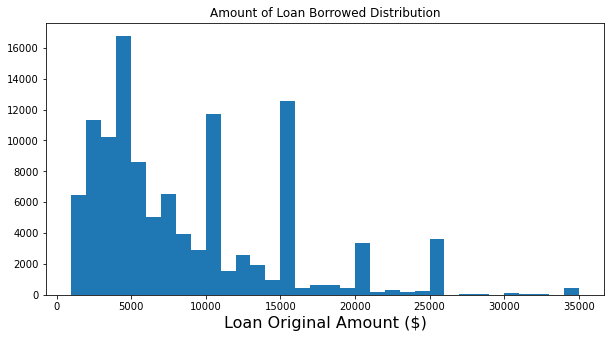

In [18]:
binsize = 1000
bins = np.arange(Loan['LoanOriginalAmount'].min(), Loan['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = Loan, x = 'LoanOriginalAmount', bins = bins)

plt.title('Amount of Loan Borrowed Distribution', fontsize = 12)
plt.xlabel('Loan Original Amount ($)', fontsize = 16)

plt.show()

The Amount of Loan Borrowed Distribution is skewed to the right therefore, so for a better view of the distribution, a log scale will be used

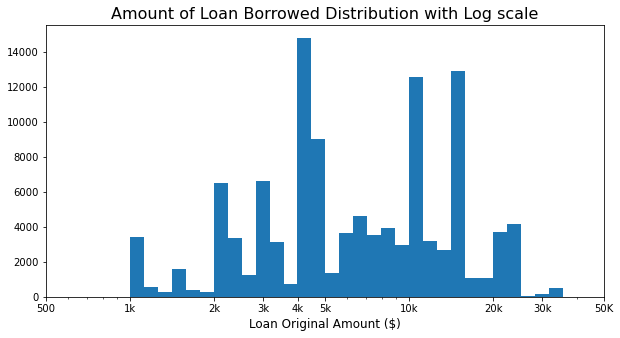

In [19]:
log_binsize = 0.05
log_bins = 10 ** np.arange(np.log10(Loan['LoanOriginalAmount'].min()), np.log10(Loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = Loan, x = 'LoanOriginalAmount', bins = log_bins);
plt.xscale('log')

plt.xticks([500, 1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '4k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)', fontsize = 12)
plt.title('Amount of Loan Borrowed Distribution with Log scale', fontsize = 16)

plt.show()

In [20]:
Loan['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

Notable amount borrowed fall between 4000 and 5000 dollars, 10000 and 20000 dollars. Amount of Loan Borrowed distribution is a unimodal distribution, with the majority of loans falling within the range of $4,000 to $12,000. The median loan amount is around $10,000, and the mean loan amount is approximately $8,500.

#### Borrower rate

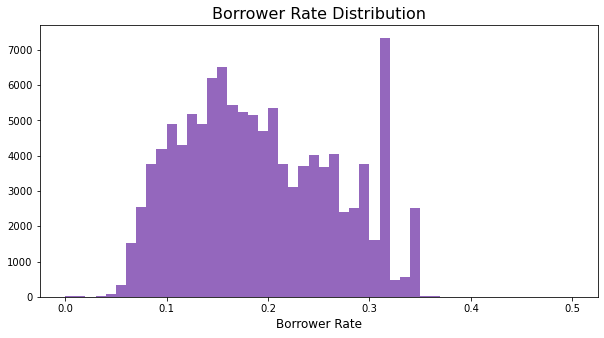

In [21]:
plt.figure(figsize=(10,5))
bins = np.arange(0, Loan['BorrowerRate'].max()+0.01, 0.01)
colour = sns.color_palette()[4]

plt.hist(data=Loan, x = 'BorrowerRate', bins = bins, color = colour )

plt.xlabel('Borrower Rate', fontsize = 12)
plt.title("Borrower Rate Distribution", fontsize = 16)

plt.show()

In [22]:
Loan['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

The Borrower Rate Distribution has two peaks. The first between midpoint 10% and 20% and the second peak at a higher peak around 30%. Also the average Brorrower Rate is 19.2%

#### Debt-to-Income Ratio

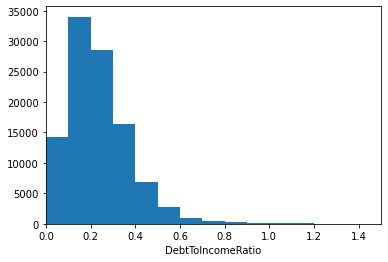

In [23]:
plt.figure()
plt.hist(data=Loan, x = 'DebtToIncomeRatio', bins = 100)
plt.xlabel('DebtToIncomeRatio')
plt.xlim(0, 1.5)

plt.show()

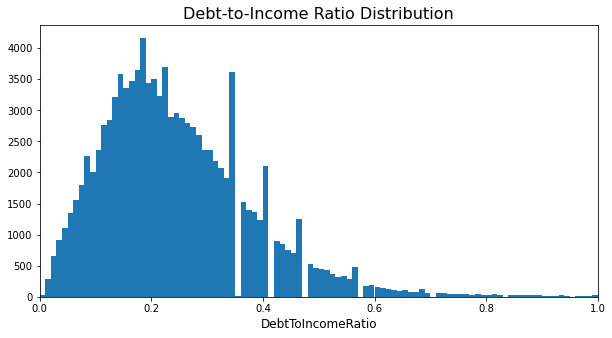

In [24]:
plt.figure(figsize =(10,5))
bins = np.arange(0, 1+0.01, 0.01)

plt.hist(data=Loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim(0, 1.0)

plt.xlabel('DebtToIncomeRatio', fontsize = 12)
plt.title('Debt-to-Income Ratio Distribution', fontsize = 16)

plt.show()

In [25]:
Loan['DebtToIncomeRatio'].median()

0.22

The Debt-to-Income distribution is right-skewed, meaning that the majority of borrowers have a DTI below the median. The median Debt-to-Income in the dataset is around 22%, indicating that the majority of borrowers have a manageable level of debt relative to their income.

#### Credit Score Plot

In [26]:
# CreditScore is the average of the CreditScoreRangeLower and the CreditScoreRangeUpper data

Loan['CreditScore'] = (Data['CreditScoreRangeUpper'] + Data['CreditScoreRangeLower'])/2

# Preview the first 5 rows of the DataFrame to confirm that the CreditScoreRange column has been added
Loan.head()

,BorrowerAPR,Term,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,ListingCategory,CreditScore
0,0.16516,36,0.1580,0,CO,Other,Self-employed,9425,0.17,"$25,000-49,999",3083.333333,Not Available,649.5
1,0.12016,36,0.0920,2,CO,Professional,Employed,10000,0.18,"$50,000-74,999",6125.000000,Home Improvement,689.5
2,0.28269,36,0.2750,0,GA,Other,Not available,3001,0.06,NaN,2083.333333,Not Available,489.5
3,0.12528,36,0.0974,16,GA,Skilled Labor,Employed,10000,0.15,"$25,000-49,999",2875.000000,Motorcycle,809.5
4,0.24614,36,0.2085,2,MN,Executive,Employed,15000,0.26,"$100,000+",9583.333333,Home Improvement,689.5


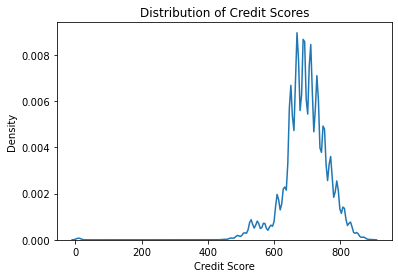

In [27]:
# Create a density plot using seaborn
sns.kdeplot(x= 'CreditScore', data = Loan)

# Set plot labels and title
plt.xlabel('Credit Score')
plt.ylabel('Density')
plt.title('Distribution of Credit Scores')

# Show the plot
plt.show()

The plot indicates that credit scores are normally distributed, with the majority of borrowers having credit scores in the range of 600-800. The plot also shows a long tail on the right side, indicating that there are some borrowers with very high credit scores.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

BorrowerAPR: The distribution of borrower APR shows a unimodal distribution with the highest frequency around 0.35-0.37. The distribution is slightly skewed to the right, indicating that the majority of borrowers have a lower APR.

IncomeRange: The income range visualization shows that the majority of borrowers have an income range of $25,000 - $74,999. The visualization also indicates that as the income range increases, the borrower APR decreases.

ListingCategory: The visualization of listing category shows that the majority of loans are taken out for debt consolidation purposes. Other popular categories include home improvement, business, and auto.

CreditScore: The visualization of credit score indicates that the majority of borrowers have a credit score between 600 and 800. The visualization also shows a negative correlation between credit score and borrower APR.

LoanTerm: The majority of loans have a term of either 36 or 60 months.

BorrowerState: California has the highest number of borrowers, followed by Texas, New York, and Florida.

Occupation: The most common occupation for borrowers is professional, followed by executive and administrative assistant.

DebtToIncomeRatio: The majority of borrowers have a debt-to-income ratio between 0.1 and 0.4, with the highest frequency around 0.2.

EmploymentStatus: The majority of borrowers are employed, with full-time employment being the most common status.

LoanOriginalAmount: The distribution of loan original amount is right-skewed with a peak around $10,000. it took on a large range of values and it is skewed, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between  500 𝑎𝑛𝑑 1000, and another just below $5000. 

BorrowerRate: The distribution of borrower rate is similar to borrower APR, with a unimodal distribution skewed to the right.

The LoanOriginalAmount variable took on a large range of values and skewed, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between  500𝑎𝑛𝑑
 1000, and another just below $5000. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Out of 81 columns, only 11 columns were used and the rest filtered. 

> The Amount of Loan Borrowed Distribution is skewed to the right therefore, so for a better view of the distribution, a log scale was be used.

> Credit score column was created from CreditScoreRangeUpper and CreditScoreRangeLower columns

## Bivariate Exploration

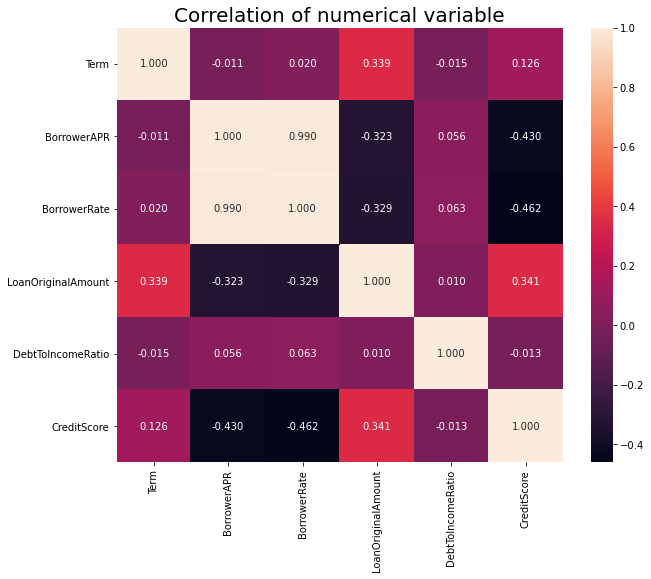

In [28]:
# Making a list of all numerical variables.
numeric_var = ['Term', 'BorrowerAPR', 'BorrowerRate', 'LoanOriginalAmount', 'DebtToIncomeRatio','IncomeRange', 'CreditScore']

# Plotting a heat map to show the correlation of each numerical variable.
plt.figure(figsize=(10,8))
sns.heatmap(data=Loan[numeric_var].corr(),annot=True,fmt='.3f')

plt.title('Correlation of numerical variable', fontsize = 20)

plt.show()

#### Relationship Between Borrower's APR and Amount of Loan Borrowed

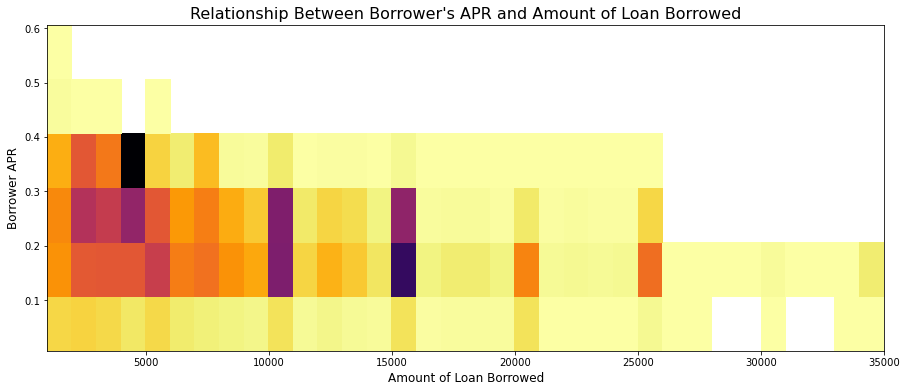

In [29]:
plt.figure(figsize = [15, 6]) 

bins_x = np.arange(Loan['LoanOriginalAmount'].min(), Loan['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(Loan['BorrowerAPR'].min(), Loan['BorrowerAPR'].max()+0.1, 0.1)

plt.hist2d(data = Loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'inferno_r', cmin = 0.5)

plt.title("Relationship Between Borrower's APR and Amount of Loan Borrowed", fontsize = 16)
plt.xlabel('Amount of Loan Borrowed', fontsize = 12)
plt.ylabel("Borrower APR", fontsize = 12)

plt.show()

The heatmap shows that loans with low APRs are typically for higher loan amounts, while loans with the high APRs (above 20%) are typically for lower loan amount. Loans with APRs between 10% and 20% are more evenly distributed across the range of loan amounts.

The heatmap also highlights some interesting patterns in the data. For example, there are a number of loans with very high APRs (above 35%) and very low loan amounts (below $5,000)

#### Borrower APR vs. Borrower rate

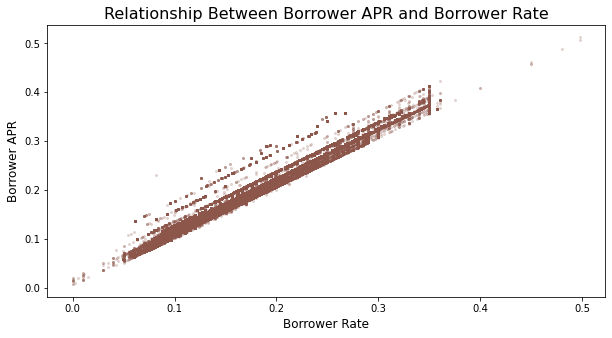

In [30]:
plt.figure(figsize= (10, 5))

color = sns.color_palette()[5]

plt.scatter(y='BorrowerAPR', x='BorrowerRate', color = color, data=Loan, s=4, alpha=0.2);

plt.xlabel('Borrower Rate', fontsize = 12)
plt.ylabel("Borrower APR", fontsize = 12)
plt.title("Relationship Between Borrower APR and Borrower Rate", fontsize = 16)

plt.show()

The Borrower APR vs Borrower Ratescatterplot shows a strong positive linear relationship between the Borrower's APR and the Borrower rate. This means that as the APR increases, the Borrower rate also tends to increase.

#### Borrower's APR vs. Employment Status

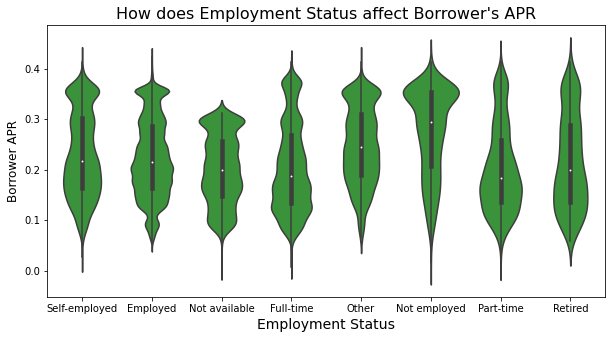

In [31]:
plt.figure(figsize= (10, 5))

color = sns.color_palette()[2]

sns.violinplot(data=Loan, x='EmploymentStatus', y='BorrowerAPR', color=color)

plt.title("How does Employment Status affect Borrower's APR", fontsize = 16)
plt.xlabel('Employment Status', fontsize = 14)
plt.ylabel('Borrower APR', fontsize = 12)

plt.show()

The violin curves for the Employed, Full-time and not available categories are wider indicating a wider range of APR values for loans taken out by borrowers in those categories. The curves for the Self-employed and Retired categories are narrower, indicating that loans taken out by borrowers in those categories tend to have more similar APR values.

Additionally, the violinplot shows that borrowers who are Not employed or Other tend to have higher APRs on average than borrowers in the other employment status categories.

#### Borrower's APR vs. Credit Score

In [32]:
# Create a new column for credit score range
credit_score_bins = [0, 600, 650, 700, 750, 800, 850]
credit_score_labels = ['<600', '600-649', '650-699', '700-749', '750-799', '800+']
Loan['CreditScoreRange'] = pd.cut(Loan['CreditScore'], bins=credit_score_bins, labels=credit_score_labels)

# Preview the first 5 rows of the DataFrame to confirm that the CreditScoreRange column has been added
Loan.head()

,BorrowerAPR,Term,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,ListingCategory,CreditScore,CreditScoreRange
0,0.16516,36,0.1580,0,CO,Other,Self-employed,9425,0.17,"$25,000-49,999",3083.333333,Not Available,649.5,600-649
1,0.12016,36,0.0920,2,CO,Professional,Employed,10000,0.18,"$50,000-74,999",6125.000000,Home Improvement,689.5,650-699
2,0.28269,36,0.2750,0,GA,Other,Not available,3001,0.06,NaN,2083.333333,Not Available,489.5,<600
3,0.12528,36,0.0974,16,GA,Skilled Labor,Employed,10000,0.15,"$25,000-49,999",2875.000000,Motorcycle,809.5,800+
4,0.24614,36,0.2085,2,MN,Executive,Employed,15000,0.26,"$100,000+",9583.333333,Home Improvement,689.5,650-699


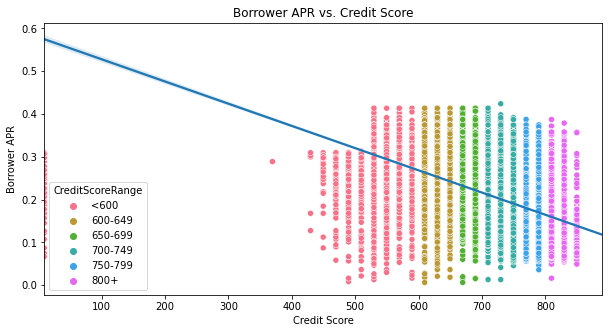

In [33]:
plt.figure(figsize=(10,5))
# Create a color palette for the scatterplot based on the credit score range
color_palette = sns.color_palette('husl', len(credit_score_labels))
color_mapping = dict(zip(credit_score_labels, color_palette))

# Create the scatterplot with color-coded data points
scatterplot = sns.scatterplot(x='CreditScore', y='BorrowerAPR', hue='CreditScoreRange', data=Loan, palette=color_mapping)

# Add a trendline to the scatterplot
sns.regplot(x='CreditScore', y='BorrowerAPR', data=Loan, scatter=False)

# Set the plot title and axis labels
plt.title('Borrower APR vs. Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Borrower APR')

# Display the plot
plt.show()


The trendline added to the scatterplot is a line of best fit that represents the overall relationship between credit score and borrower APR. The slope of the trendline shows the direction and strength of the relationship, while the intercept represents the predicted value of borrower APR when credit score is zero

#### Boxplot of Borrower's APR vs. Loan Term

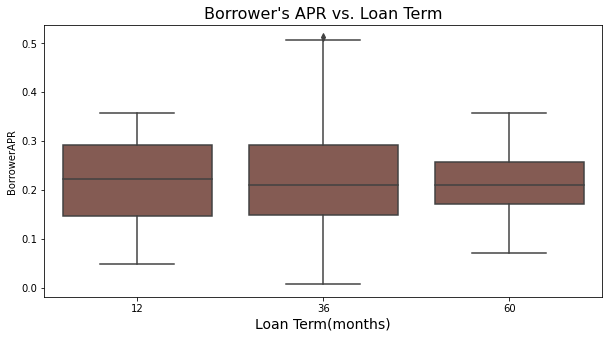

In [34]:
plt.figure(figsize= (10, 5))
color = sns.color_palette()[5]

sns.boxplot(data=Loan, x='Term', y='BorrowerAPR', color=color)

plt.title("Borrower's APR vs. Loan Term", fontsize=16)
plt.xlabel('Loan Term(months)', fontsize=14)

plt.show()

The loan terms have a similar mean of Borrower APR which falls around 22%. There are more outliers in the 36-month loan term category than in the other months.

#### Borrower's APR vs. Debit-to-Income Ratio

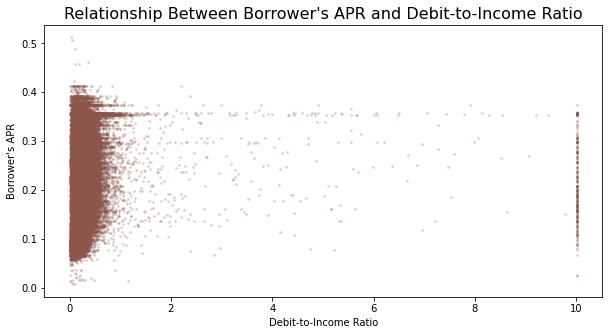

In [35]:
plt.figure(figsize= (10, 5));
color = sns.color_palette()[5]

plt.scatter(y='BorrowerAPR', x='DebtToIncomeRatio', color = color, s=3, alpha= 0.2, data=Loan);

plt.xlabel('Debit-to-Income Ratio')
plt.ylabel("Borrower's APR")
plt.title("Relationship Between Borrower's APR and Debit-to-Income Ratio", fontsize=16)

plt.show()

The scatterplot shows a weak positive linear relationship between the Borrower's APR and the DTI. This means that as the DTI increases, the Borrower's APR also tends to increase slightly.

#### Borrower's APR vs. Income Range

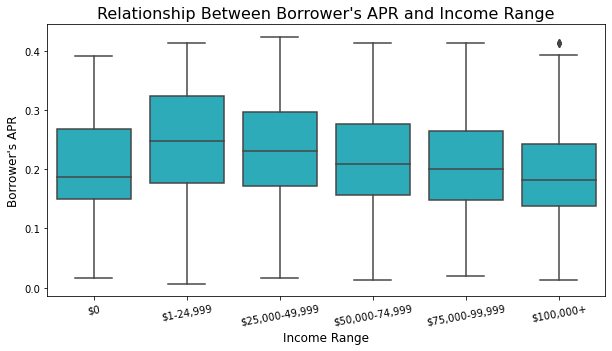

In [36]:
plt.figure(figsize= (10, 5));
color = sns.color_palette()[9]

sns.boxplot(y='BorrowerAPR', x='IncomeRange', color = color, data=Loan)

plt.xlabel('Income Range', fontsize=12)
plt.xticks(rotation=10)
plt.ylabel("Borrower's APR", fontsize=12)
plt.title("Relationship Between Borrower's APR and Income Range", fontsize=16)

plt.show()

Borrowers with higher income ranges tend to have lower APRs on average than borrowers with lower income ranges. Specifically, the median APR decreases as the income range increases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The boxplot of borrower APR vs. loan term showed that the median APR tends to decrease as the loan term increases.

> The scatterplot of borrower APR vs. borrower rate showed a strong positive correlation between the two variables.

> The violin plot of borrower APR vs. employment status showed that self-employed borrowers tend to have higher APRs compared to other employment statuses.

> The heatmap of borrower APR vs. credit score showed that borrowers with higher credit scores tend to have lower APRs.

> The boxplot of borrower APR vs. income range showed that borrowers with higher income tend to have lower APRs.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> -

## Multivariate Exploration

#### Relationship between Borrower's APR and Debt-to-Income Ratio and Borrower's Credit Score

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


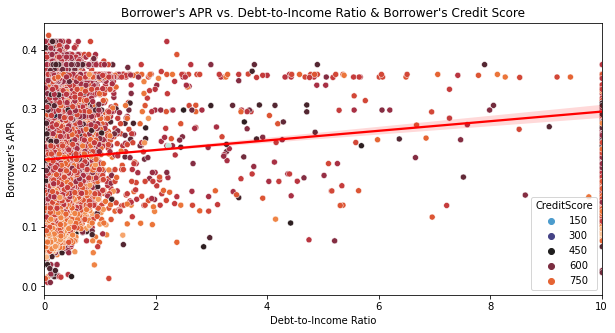

In [37]:
plt.figure(figsize=(10,5))

# Create scatterplot with color-coded data points
sns.scatterplot(data=Loan, x='DebtToIncomeRatio', y='BorrowerAPR', hue='CreditScore', palette = 'icefire')

# Add trendline to scatterplot
sns.regplot(data=Loan, x='DebtToIncomeRatio', y='BorrowerAPR', scatter=False, color='red')

# Add axis labels and title
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel("Borrower's APR")
plt.title("Borrower's APR vs. Debt-to-Income Ratio & Borrower's Credit Score")
plt.show()

Borrowers with lower credit scores have higher APRs compared to borrowers with higher credit scores, irrespective of their debt-to-income ratio.
The trendline shows a positive correlation between debt-to-income ratio and APR, indicating that borrowers with higher debt-to-income ratios tend to have higher APRs.
The color-coded data points show that borrowers with lower credit scores and higher debt-to-income ratios have the highest APRs, which indicates that these borrowers are considered high-risk by the lenders.
Borrowers with credit scores above 700 have lower APRs compared to borrowers with credit scores below 700, regardless of their debt-to-income ratio. This suggests that credit score plays a significant role in determining the interest rate a borrower is offered.
It also shows that borrowers with higher credit scores and lower debt-to-income ratios are more likely to get favorable interest rates.

#### Let's find the relationship between 'Employment status' and 'Borrower APR' with 'Borrower Rate'.

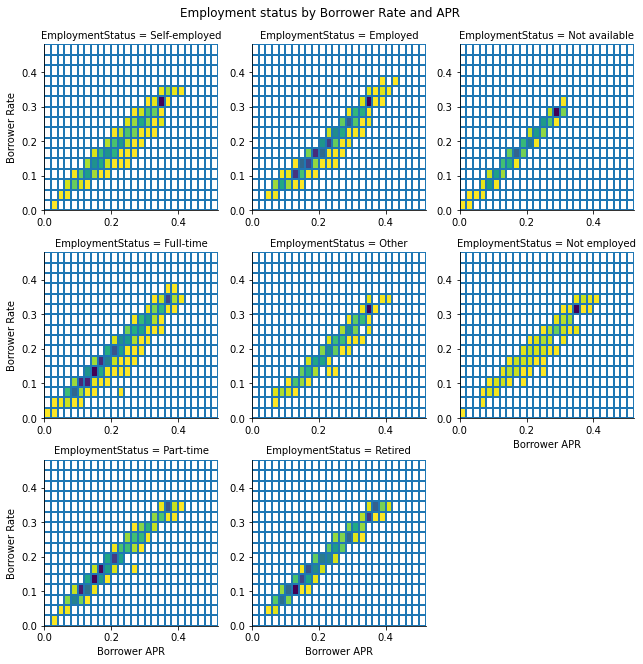

In [38]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,Loan['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,Loan['BorrowerRate'].max()+0.01,0.03)

g = sns.FacetGrid(data = Loan, col = 'EmploymentStatus', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)

g.set_xlabels('Borrower APR')
g.set_ylabels('Borrower Rate')
g.fig.suptitle('Employment status by Borrower Rate and APR', y=1.02)

plt.show()

Borrowers who are not employed, retired, or have a part-time job have the highest APR and Borrower Rate, while those who are employed full-time have the lowest APR and Borrower Rate.
Borrowers who are self-employed have the highest range of APR and Borrower Rate, suggesting that being self-employed is considered a high-risk factor by the lenders.
The heatmap also shows that the highest range of APR and Borrower Rate is observed among the unemployed borrowers, indicating that being unemployed is a significant risk factor.
Borrowers who are employed but have an unknown employment status have a higher range of APR and Borrower Rate compared to other employed categories, suggesting that unknown employment status is also considered a high-risk factor by the lenders.
The heatmap highlights the importance of employment status in determining the interest rate a borrower is offered by the lender. It also shows that unemployed borrowers and self-employed borrowers are considered high-risk by the lenders, and therefore, have higher APR and Borrower Rate.

#### Heatmap of Employment vs. Loan Original Amount and Debt-to-Income Ratio

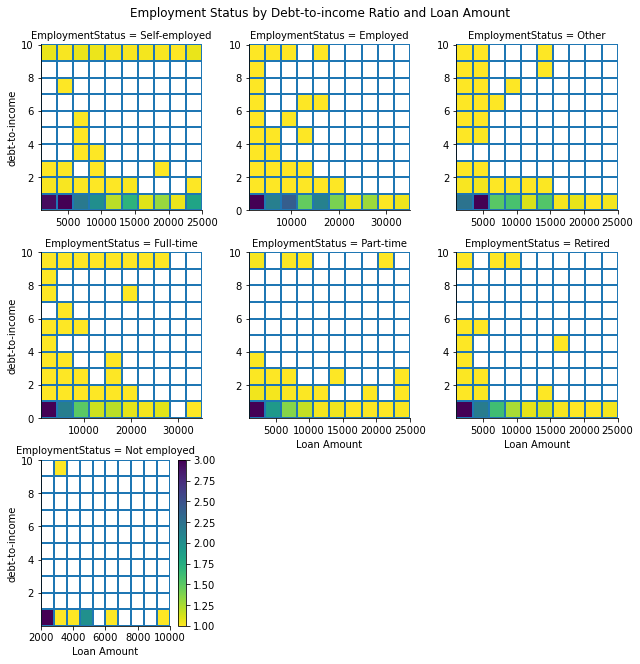

In [39]:
# Plotting heatmap using seaborn's facetgrid.
copy = Loan.copy()
Loan_copy= copy.dropna()

bins = (np.arange(0,1+0.01,0.02))**1/3
tick = [0,0.1,0.2,0.3,0.4,0.6,0.8,1]
labels = ['{}'.format(v)for v in tick]
bins_y = np.log10(np.arange(1000, Loan_copy['LoanOriginalAmount'].max()+40,1500))
tick_y=[]

g = sns.FacetGrid(data = Loan_copy, col = 'EmploymentStatus', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'LoanOriginalAmount', 'DebtToIncomeRatio', cmap = 'viridis_r', cmin = 0.5)

g.set_xlabels('Loan Amount')
g.set_ylabels('debt-to-income')
g.fig.suptitle('Employment Status by Debt-to-income Ratio and Loan Amount', y=1.02)

plt.colorbar()
plt.show()

The heatmap highlights the relationship between employment status, DTI ratio, and loan original amount. Borrowers who are employed full-time and have a low DTI ratio are likely to get approved for a higher loan original amount, while unemployed borrowers or borrowers with higher DTI ratios are likely to get approved for a lower loan original amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Borrower's APR vs. Debt-to-Income Ratio and Credit Score shows a negative correlation between APR and credit score, with higher credit scores associated with lower APRs. The trendline also shows a positive correlation between APR and debt-to-income ratio, indicating that as the ratio increases, the APR tends to increase as well. This suggests that borrowers with higher debt-to-income ratios may be seen as higher-risk and therefore may be charged higher interest rates.

> The relationship between Employment status and Borrower APR with Borrower Rate can provide valuable insights into the financial behavior of individuals with varying employment statuses. The heatmap of this relationship can reveal that self-employed borrowers tend to have higher APR and rates compared to employed and full-time workers. Borrowers with a lower income range also tend to have higher APR and rates, which may indicate a higher level of risk associated with lending to this group. Furthermore, the heatmap can also show that borrowers with higher credit scores tend to have lower APR and rates, indicating a lower risk for lenders.


### Were there any interesting or surprising interactions between features?

> The heatmap of Employment vs. Loan Original Amount and Debt-to-Income Ratio reveals interesting insights about the relationship between these variables. It shows that borrowers with higher income levels and higher credit scores tend to apply for larger loans. Additionally, borrowers with higher debt-to-income ratios tend to apply for larger loans, regardless of their employment status. Moreover, the heatmap also reveals that employed borrowers tend to have higher loan amounts and lower debt-to-income ratios compared to other employment categories.

## Conclusions
> Borrower's APR (Annual Percentage Rate) is an important metric in lending and borrowing. It represents the cost of borrowing, including interest and other fees, as an annualized percentage of the loan amount.

> The importance of borrower's APR lies in the fact that it is a key factor in determining the affordability of a loan. A lower APR means a borrower will pay less in interest over the life of the loan, making it easier to manage debt and potentially saving money. A higher APR, on the other hand, can make a loan more expensive and difficult to pay back. Borrower's APR is used by lenders to assess the creditworthiness of borrowers.
